In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpmath import mp, quad

%matplotlib widget

In [2]:
mp.dps = 100  # Set decimal precision to 50 digits

In [3]:
m = mp.mpf(9.11e-31)            # mass of electron (kg)
m_star = 0.3 * m                # effective mass of electron (kg)
e = mp.mpf(1.6e-19)             # charge of electron (C)
hbar = mp.mpf(1.05e-34)         # reduced Planck's constant (J·s)
n_imp = mp.mpf(1e13)            # impurity concentration (cm^-2)

In [8]:
def mobility(d, n_2DEG):
    k_F = mp.sqrt(2 * mp.pi * n_2DEG)
    # tau_inverse = mp.pi*hbar*n_imp/(8*m_star*(k_F*d)**3)
    # return e/(m_star*tau_inverse)
    return 8*e/(mp.pi*hbar)*(k_F*d)**3/n_imp

In [9]:
d_values = [mp.mpf(x) for x in mp.linspace(1e-8, 5e-6, 100)]
mu_values = [mobility(d, mp.mpf(1e13)) for d in d_values]


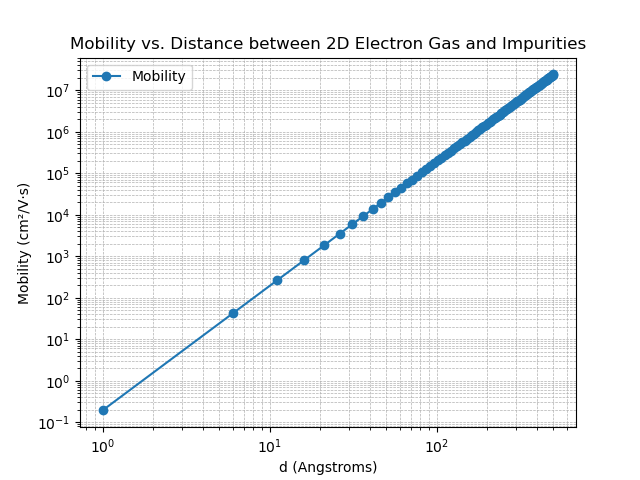

In [12]:
d_scaled = [d * mp.mpf(1e8) for d in d_values]
# Plot the mobility vs. distance
plt.close()
plt.plot(d_scaled, mu_values, marker='o', linestyle='-', label='Mobility')
plt.xlabel('d (Angstroms)')
plt.ylabel('Mobility (cm²/V·s)')
plt.xscale('log')  # Logarithmic x-axis
plt.yscale('log')  # Logarithmic y-axis
plt.title('Mobility vs. Distance between 2D Electron Gas and Impurities')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()